In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mutua\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Authinitial Keys
consumerKey = 'NXcySLTzvf96UZfY5zRVdpRxX'
consumerSecret = 'dJSwG1mopqefVZ1VvAeTr9y64zy1SQHdmtjALUyfPTAuCuMdO5'
accessToken = '1346038574010028033-Trz5KkbXmXMGGYpVviiJUFUsZjMaK6'
accessTokenSecret = 'PQ8q2riFNKfKNX3N6saFz0d7JeadG8qgsHs2eMf8wfL0p'

# Authentication
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  Kenya_Ports
Please enter how many tweets to analyze:  500


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  500
positive number:  75
negative number:  363
neutral number:  62


In [5]:
tweet_list

,0
0,RT @KenTrade_G2B: Starting 1 April 2021 applic...
1,Happy Easter! #StaySafe https://t.co/DADCTHHCuA
2,Blessed Easter! https://t.co/NFyZsruHeN
3,RT @Samwoka_: @gabrieloguda Bureaucracy betwee...
4,#Ferrykenya three ferries serving you at the L...
...,...
495,RT @benjimk: 🇰🇪Kenya Ports Authority (KPA) con...
496,Evening peak;\n#likonichannel Three ferries se...
497,RT @benjimk: 🇰🇪Kenya Ports Authority (KPA) con...
498,RT @benjimk: 🇰🇪Kenya Ports Authority (KPA) con...


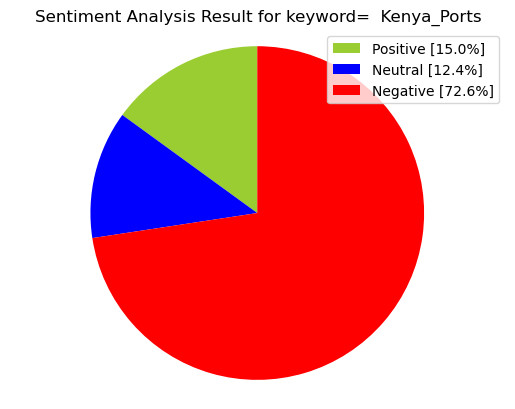

In [44]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [45]:
tweet_list.drop_duplicates(inplace = True)

TypeError: unhashable type: 'list'

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [46]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @KenTrade_G2B: Starting 1 April 2021 applic...,RT @KenTrade_G2B: Starting 1 April 2021 applic...,-0.02381,0.104762,neutral,0.0,1.000,0.000,0.0000,109,17,starting april applications for kebs local ...,"[, starting, april, applications, for, kebs, l...","[, starting, april, applications, kebs, local,...","[, start, april, applic, keb, local, coc, shal..."
1,Happy Easter! #StaySafe https://t.co/DADCTHHCuA,Happy Easter! #StaySafe https://t.co/DADCTHHCuA,0.80000,1.000000,positive,0.0,0.351,0.649,0.5719,25,3,happy easter staysafe,"[happy, easter, staysafe, ]","[happy, easter, staysafe, ]","[happi, easter, staysaf, ]"
2,Blessed Easter! https://t.co/NFyZsruHeN,Blessed Easter! https://t.co/NFyZsruHeN,0.00000,0.000000,positive,0.0,0.204,0.796,0.5994,17,2,blessed easter,"[blessed, easter, ]","[blessed, easter, ]","[bless, easter, ]"
3,RT @Samwoka_: @gabrieloguda Bureaucracy betwee...,RT @Samwoka_: @gabrieloguda Bureaucracy betwee...,0.00000,0.000000,neutral,0.0,1.000,0.000,0.0000,94,12,bureaucracy between government agencies ...,"[, bureaucracy, between, government, agencies,...","[, bureaucracy, government, agencies, kenya, m...","[, bureaucraci, govern, agenc, kenya, million,..."
4,#Ferrykenya three ferries serving you at the L...,#Ferrykenya three ferries serving you at the L...,0.00000,0.000000,neutral,0.0,1.000,0.000,0.0000,118,18,ferrykenya three ferries serving you at the l...,"[, ferrykenya, three, ferries, serving, you, a...","[, ferrykenya, three, ferries, serving, likoni...","[, ferrykenya, three, ferri, serv, likoni, cha..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,@WilliamsRuto @maangi @OsoroSylvanus @Kenya_Po...,@WilliamsRuto @maangi @OsoroSylvanus @Kenya_Po...,0.00000,0.000000,neutral,0.0,1.000,0.000,0.0000,40,5,ports easter namnagani my fred,"[, ports, easter, namnagani, my, fred]","[, ports, easter, namnagani, fred]","[, port, easter, namnagani, fred]"
492,@Jakasipul1 @ItsKiprotich1 @WilliamsRuto @maan...,@Jakasipul1 @ItsKiprotich1 @WilliamsRuto @maan...,0.00000,0.000000,neutral,0.0,1.000,0.000,0.0000,26,2,ports hahaaaaa,"[, ports, hahaaaaa]","[, ports, hahaaaaa]","[, port, hahaaaaa]"
493,Kenya Ports Authority has reported improved tr...,Kenya Ports Authority has reported improved tr...,0.00000,0.000000,positive,0.0,0.773,0.227,0.5267,118,18,kenya ports authority has reported improved tr...,"[kenya, ports, authority, has, reported, impro...","[kenya, ports, authority, reported, improved, ...","[kenya, port, author, report, improv, truck, t..."
494,Kenya Ports Authority has reported improved tr...,Kenya Ports Authority has reported improved tr...,0.00000,0.000000,positive,0.0,0.773,0.227,0.5267,118,18,kenya ports authority has reported improved tr...,"[kenya, ports, authority, has, reported, impro...","[kenya, ports, authority, reported, improved, ...","[kenya, port, author, report, improv, truck, t..."


In [47]:
tweet_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @KenTrade_G2B: Starting 1 April 2021 applic...,RT @KenTrade_G2B: Starting 1 April 2021 applic...,-0.02381,0.104762,neutral,0.0,1.000,0.000,0.0000,109,17,starting april applications for kebs local ...,"[, starting, april, applications, for, kebs, l...","[, starting, april, applications, kebs, local,...","[, start, april, applic, keb, local, coc, shal..."
1,Happy Easter! #StaySafe https://t.co/DADCTHHCuA,Happy Easter! #StaySafe https://t.co/DADCTHHCuA,0.80000,1.000000,positive,0.0,0.351,0.649,0.5719,25,3,happy easter staysafe,"[happy, easter, staysafe, ]","[happy, easter, staysafe, ]","[happi, easter, staysaf, ]"
2,Blessed Easter! https://t.co/NFyZsruHeN,Blessed Easter! https://t.co/NFyZsruHeN,0.00000,0.000000,positive,0.0,0.204,0.796,0.5994,17,2,blessed easter,"[blessed, easter, ]","[blessed, easter, ]","[bless, easter, ]"
3,RT @Samwoka_: @gabrieloguda Bureaucracy betwee...,RT @Samwoka_: @gabrieloguda Bureaucracy betwee...,0.00000,0.000000,neutral,0.0,1.000,0.000,0.0000,94,12,bureaucracy between government agencies ...,"[, bureaucracy, between, government, agencies,...","[, bureaucracy, government, agencies, kenya, m...","[, bureaucraci, govern, agenc, kenya, million,..."
4,#Ferrykenya three ferries serving you at the L...,#Ferrykenya three ferries serving you at the L...,0.00000,0.000000,neutral,0.0,1.000,0.000,0.0000,118,18,ferrykenya three ferries serving you at the l...,"[, ferrykenya, three, ferries, serving, you, a...","[, ferrykenya, three, ferries, serving, likoni...","[, ferrykenya, three, ferri, serv, likoni, cha..."


In [48]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @KenTrade_G2B: Starting 1 April 2021 applic...,starting 1 april 2021 applications for kebs l...,-0.02381,0.104762,neutral,0.0,1.000,0.000,0.0000,109,17,starting april applications for kebs local ...,"[, starting, april, applications, for, kebs, l...","[, starting, april, applications, kebs, local,...","[, start, april, applic, keb, local, coc, shal..."
1,Happy Easter! #StaySafe https://t.co/DADCTHHCuA,happy easter staysafe,0.80000,1.000000,positive,0.0,0.351,0.649,0.5719,25,3,happy easter staysafe,"[happy, easter, staysafe, ]","[happy, easter, staysafe, ]","[happi, easter, staysaf, ]"
2,Blessed Easter! https://t.co/NFyZsruHeN,blessed easter,0.00000,0.000000,positive,0.0,0.204,0.796,0.5994,17,2,blessed easter,"[blessed, easter, ]","[blessed, easter, ]","[bless, easter, ]"
3,RT @Samwoka_: @gabrieloguda Bureaucracy betwee...,bureaucracy between government agencies ...,0.00000,0.000000,neutral,0.0,1.000,0.000,0.0000,94,12,bureaucracy between government agencies ...,"[, bureaucracy, between, government, agencies,...","[, bureaucracy, government, agencies, kenya, m...","[, bureaucraci, govern, agenc, kenya, million,..."
4,#Ferrykenya three ferries serving you at the L...,ferrykenya three ferries serving you at the l...,0.00000,0.000000,neutral,0.0,1.000,0.000,0.0000,118,18,ferrykenya three ferries serving you at the l...,"[, ferrykenya, three, ferries, serving, you, a...","[, ferrykenya, three, ferries, serving, likoni...","[, ferrykenya, three, ferri, serv, likoni, cha..."


In [49]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @KenTrade_G2B: Starting 1 April 2021 applic...,starting 1 april 2021 applications for kebs l...,-0.023810,0.104762,neutral,0.0,1.000,0.000,0.0000,109,17,starting april applications for kebs local ...,"[, starting, april, applications, for, kebs, l...","[, starting, april, applications, kebs, local,...","[, start, april, applic, keb, local, coc, shal..."
1,Happy Easter! #StaySafe https://t.co/DADCTHHCuA,happy easter staysafe,0.800000,1.000000,positive,0.0,0.351,0.649,0.5719,25,3,happy easter staysafe,"[happy, easter, staysafe, ]","[happy, easter, staysafe, ]","[happi, easter, staysaf, ]"
2,Blessed Easter! https://t.co/NFyZsruHeN,blessed easter,0.000000,0.000000,positive,0.0,0.204,0.796,0.5994,17,2,blessed easter,"[blessed, easter, ]","[blessed, easter, ]","[bless, easter, ]"
3,RT @Samwoka_: @gabrieloguda Bureaucracy betwee...,bureaucracy between government agencies ...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000,94,12,bureaucracy between government agencies ...,"[, bureaucracy, between, government, agencies,...","[, bureaucracy, government, agencies, kenya, m...","[, bureaucraci, govern, agenc, kenya, million,..."
4,#Ferrykenya three ferries serving you at the L...,ferrykenya three ferries serving you at the l...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000,118,18,ferrykenya three ferries serving you at the l...,"[, ferrykenya, three, ferries, serving, you, a...","[, ferrykenya, three, ferries, serving, likoni...","[, ferrykenya, three, ferri, serv, likoni, cha..."
5,https://t.co/aDJaBWZGu8 Great Job #Kenya. #Afr...,great job kenya african countries can lea...,0.400000,0.375000,positive,0.0,0.690,0.310,0.6597,96,15,great job kenya african countries can lea...,"[, great, job, kenya, african, countries, can,...","[, great, job, kenya, african, countries, lear...","[, great, job, kenya, african, countri, learn,..."
6,RT @umutcagrisari: One French guy owns 16 port...,one french guy owns 16 ports in west africa a...,0.033333,0.216667,neutral,0.0,1.000,0.000,0.0000,122,22,one french guy owns ports in west africa and...,"[, one, french, guy, owns, ports, in, west, af...","[, one, french, guy, owns, ports, west, africa...","[, one, french, guy, own, port, west, africa, ..."
7,"RT @NorthernCoridor: March 24 - 30, 2021 #Nort...",march 24 30 2021 northerncorridorperforma...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000,89,7,march northerncorridorperformancedashb...,"[, march, northerncorridorperformancedashboard...","[, march, northerncorridorperformancedashboard...","[, march, northerncorridorperformancedashboard..."
8,"March 24 - 30, 2021 #NorthernCorridorPerforman...",march 24 30 2021 northerncorridorperforman...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000,88,7,march northerncorridorperformancedashbo...,"[march, northerncorridorperformancedashboard, ...","[march, northerncorridorperformancedashboard, ...","[march, northerncorridorperformancedashboard, ..."
9,"March 17 - 23, 2021 #NorthernCorridorPerforman...",march 17 23 2021 northerncorridorperforman...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000,88,7,march northerncorridorperformancedashbo...,"[march, northerncorridorperformancedashboard, ...","[march, northerncorridorperformancedashboard, ...","[march, northerncorridorperformancedashboard, ..."


In [12]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [13]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [50]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,64,36.16
negative,61,34.46
neutral,52,29.38


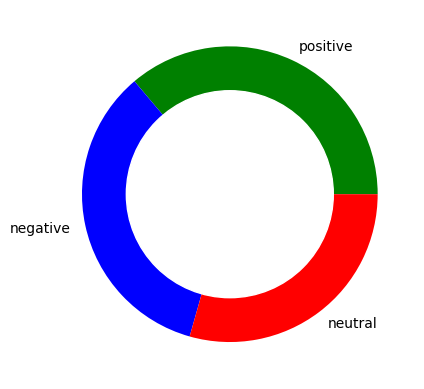

In [51]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [60]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


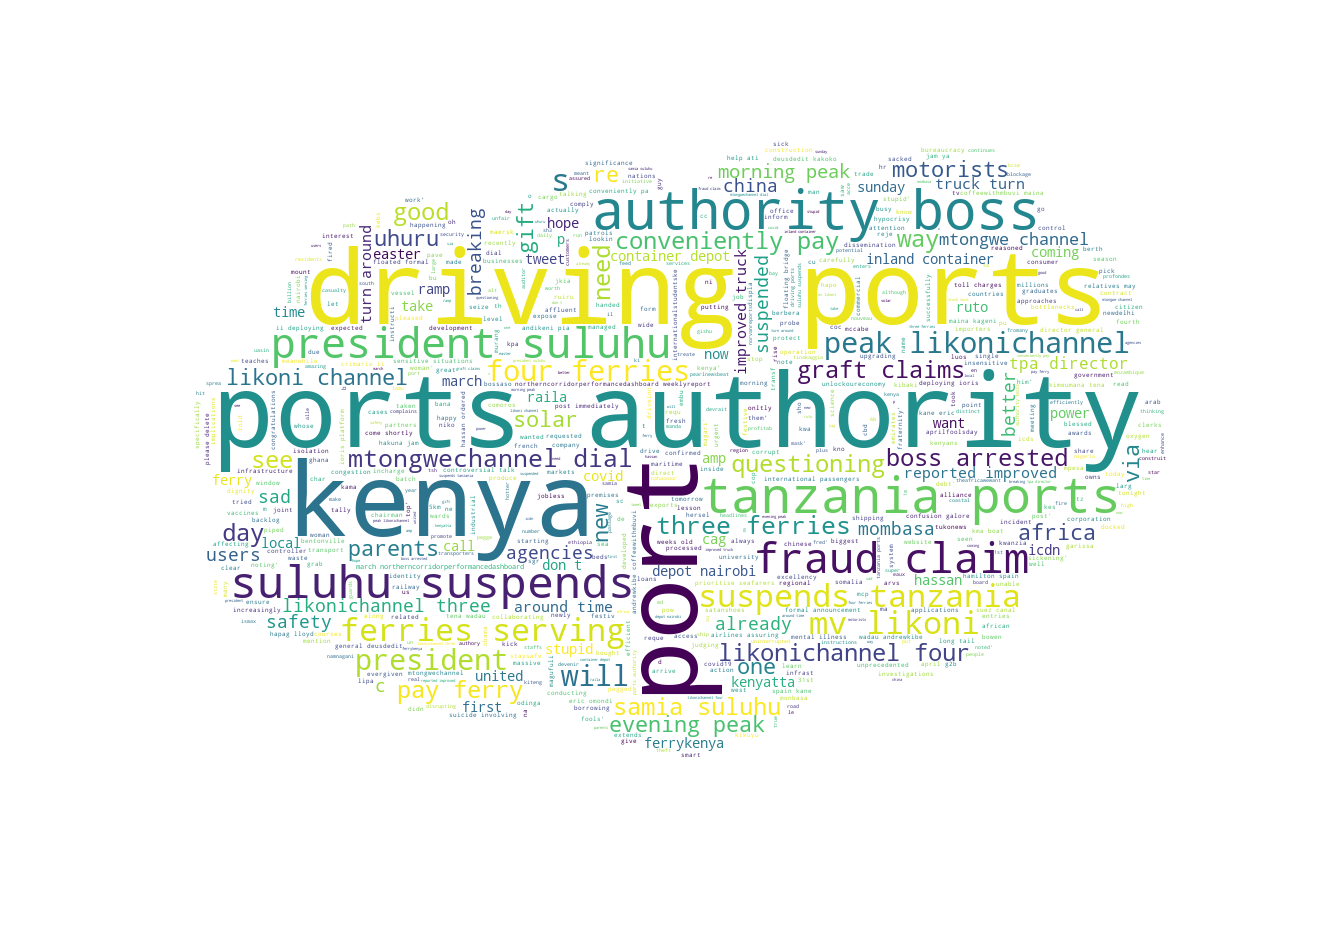

In [63]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


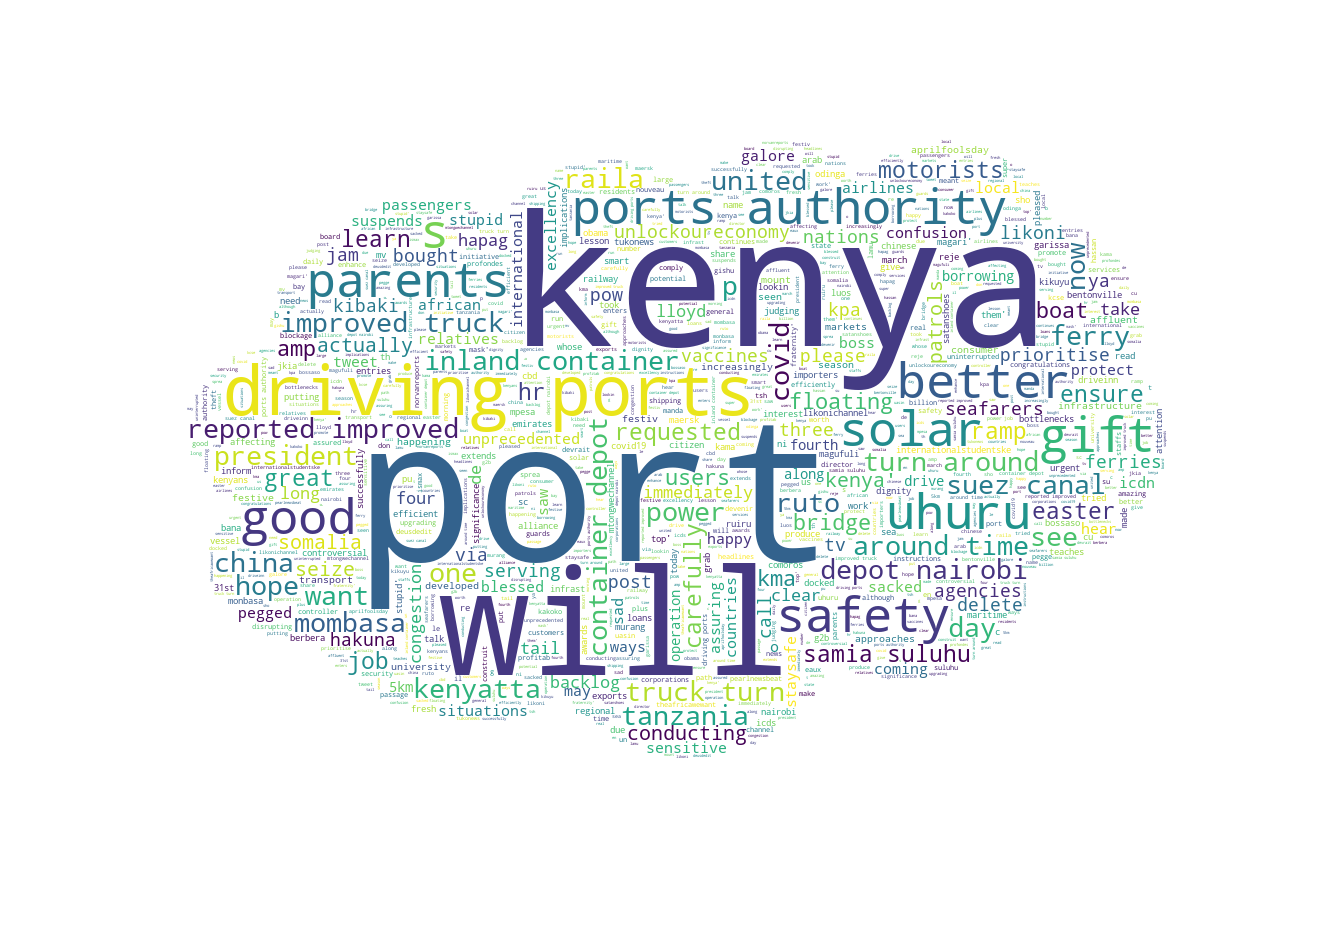

In [54]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


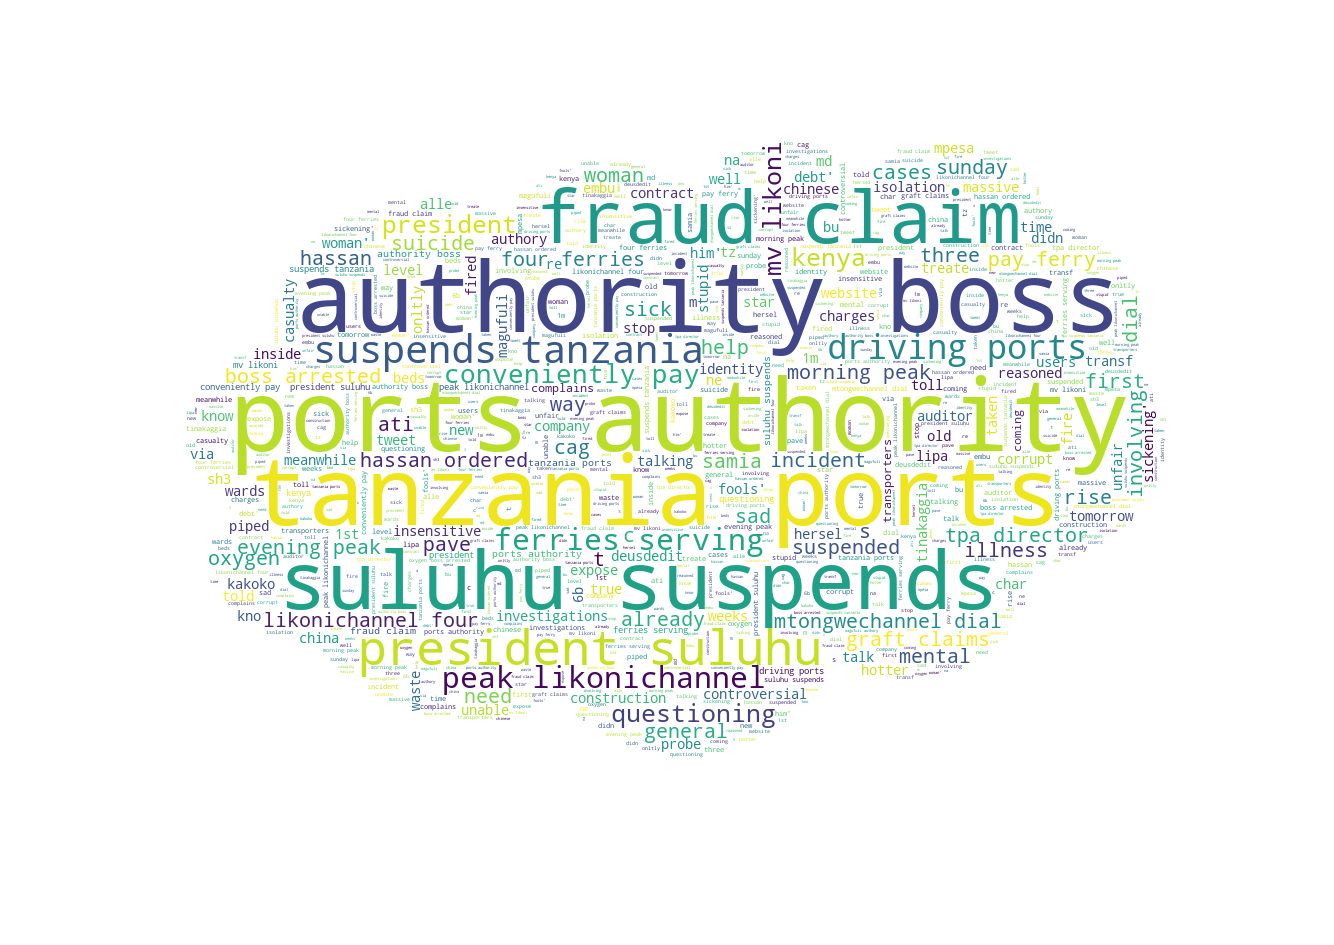

In [65]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


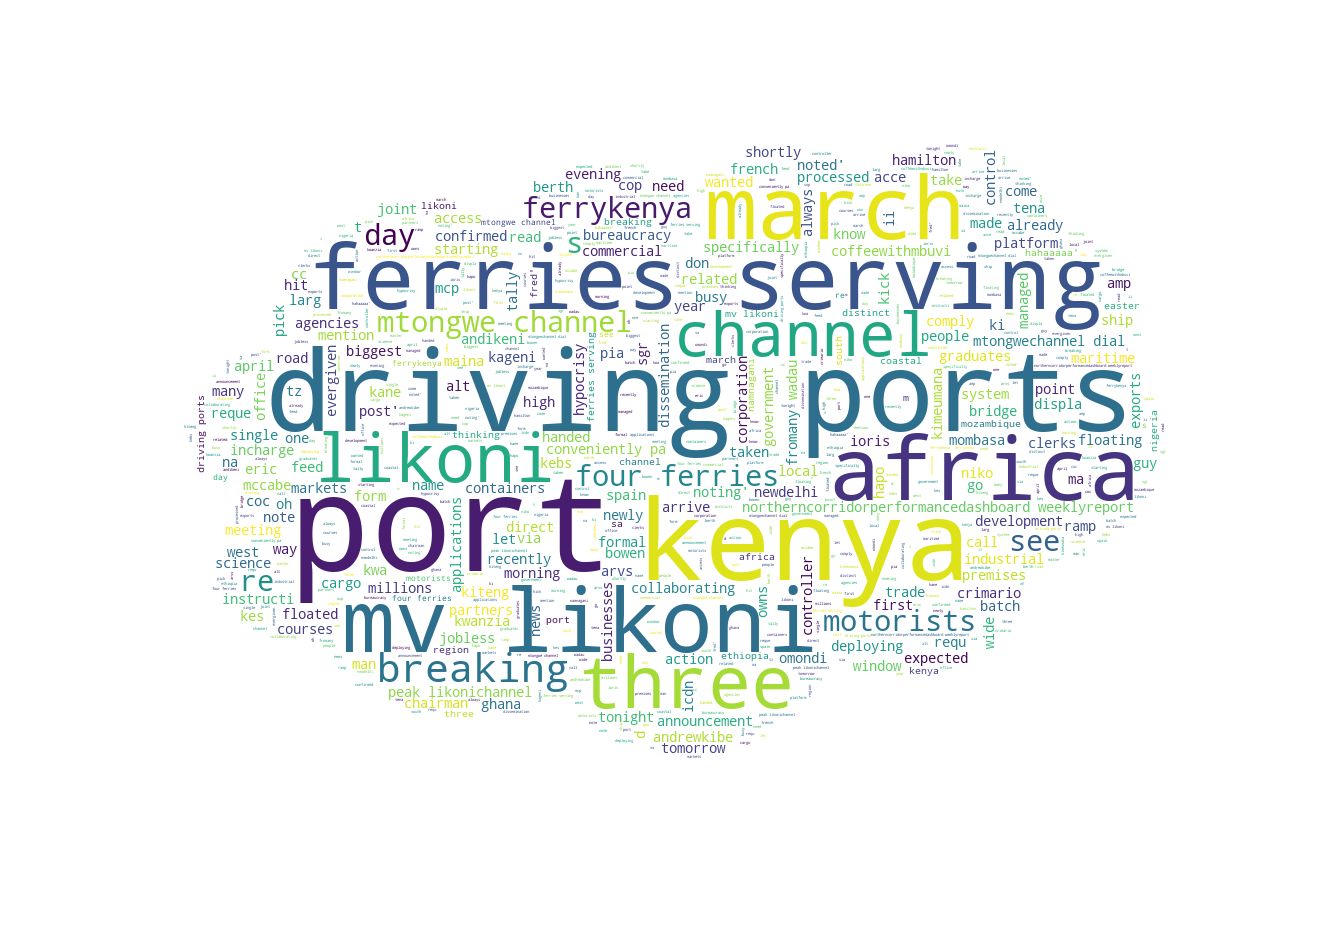

In [66]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [67]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [69]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,86.84
neutral,78.73
positive,88.52


In [70]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,12.38
neutral,11.04
positive,13.31


In [71]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [72]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [73]:
import nltk
nltk.download('stopwords')

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mutua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [75]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [76]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @KenTrade_G2B: Starting 1 April 2021 applic...,starting 1 april 2021 applications for kebs l...,-0.02381,0.104762,neutral,0.0,1.000,0.000,0.0000,109,17,starting april applications for kebs local ...,"[, starting, april, applications, for, kebs, l...","[, starting, april, applications, kebs, local,...","[, start, april, applic, keb, local, coc, shal..."
1,Happy Easter! #StaySafe https://t.co/DADCTHHCuA,happy easter staysafe,0.80000,1.000000,positive,0.0,0.351,0.649,0.5719,25,3,happy easter staysafe,"[happy, easter, staysafe, ]","[happy, easter, staysafe, ]","[happi, easter, staysaf, ]"
2,Blessed Easter! https://t.co/NFyZsruHeN,blessed easter,0.00000,0.000000,positive,0.0,0.204,0.796,0.5994,17,2,blessed easter,"[blessed, easter, ]","[blessed, easter, ]","[bless, easter, ]"
3,RT @Samwoka_: @gabrieloguda Bureaucracy betwee...,bureaucracy between government agencies ...,0.00000,0.000000,neutral,0.0,1.000,0.000,0.0000,94,12,bureaucracy between government agencies ...,"[, bureaucracy, between, government, agencies,...","[, bureaucracy, government, agencies, kenya, m...","[, bureaucraci, govern, agenc, kenya, million,..."
4,#Ferrykenya three ferries serving you at the L...,ferrykenya three ferries serving you at the l...,0.00000,0.000000,neutral,0.0,1.000,0.000,0.0000,118,18,ferrykenya three ferries serving you at the l...,"[, ferrykenya, three, ferries, serving, you, a...","[, ferrykenya, three, ferries, serving, likoni...","[, ferrykenya, three, ferri, serv, likoni, cha..."


In [78]:
tw_list.to_csv("kpatweets.csv")

In [79]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

177 Number of reviews has 549 words


In [80]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,acc,access,action,actual,affect,affluent,africa,african,agenc,...,west,whose,wide,window,woman,work,worth,would,ya,year
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
port,131
author,41
kenya,37
drive,33
tanzania,32
boss,31
presid,30
suluhu,29
suspend,27
claim,27


In [82]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [83]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('ports authority', 40),
 ('driving ports', 32),
 ('authority boss', 31),
 ('tanzania ports', 26),
 ('suluhu suspends', 22),
 ('president suluhu', 21),
 ('fraud claims', 20),
 ('suspends tanzania', 19),
 ('boss fraud', 19),
 ('ferries serving', 17),
 ('mv likoni', 13),
 ('likonichannel ferries', 12),
 ('peak likonichannel', 11),
 ('dial 721', 11),
 ('721 conveniently', 11),
 ('serving mv', 10),
 ('likoni mtongwechannel', 10),
 ('mtongwechannel dial', 9),
 ('conveniently pay', 8),
 ('samia suluhu', 7)]

In [84]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('ports authority boss', 31),
 ('tanzania ports authority', 26),
 ('president suluhu suspends', 21),
 ('suluhu suspends tanzania', 19),
 ('authority boss fraud', 19),
 ('boss fraud claims', 19),
 ('suspends tanzania ports', 18),
 ('likonichannel ferries serving', 12),
 ('peak likonichannel ferries', 11),
 ('dial 721 conveniently', 11),
 ('ferries serving mv', 10),
 ('serving mv likoni', 10),
 ('mv likoni mtongwechannel', 10),
 ('likoni mtongwechannel dial', 9),
 ('mtongwechannel dial 721', 9),
 ('721 conveniently pay', 8),
 ('conveniently pay ferry', 6),
 ('authority boss arrested', 6),
 ('boss arrested questioning', 6),
 ('arrested questioning graft', 6)]